#  Projet Python data visualisation  

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Dataset des résultats de courses de F1 de 1950 à 2021

In [22]:
df = pd.read_csv('../Python/data/F1_results.csv') 
df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24975,24981,1052,854,210,47,18,16,16,16,0.0,55,\N,\N,38,18,1:36.134,202.667,11
24976,24982,1052,842,213,10,5,17,17,17,0.0,52,\N,\N,48,5,1:34.090,207.069,31
24977,24983,1052,849,3,6,17,18,18,18,0.0,51,\N,\N,16,19,1:36.602,201.685,31
24978,24984,1052,4,214,14,9,\N,R,19,0.0,32,\N,\N,31,17,1:36.063,202.816,23


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24980 entries, 0 to 24979
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         24980 non-null  int64  
 1   raceId           24980 non-null  int64  
 2   driverId         24980 non-null  int64  
 3   constructorId    24980 non-null  int64  
 4   number           24980 non-null  object 
 5   grid             24980 non-null  int64  
 6   position         24980 non-null  object 
 7   positionText     24980 non-null  object 
 8   positionOrder    24980 non-null  int64  
 9   points           24980 non-null  float64
 10  laps             24980 non-null  int64  
 11  time             24980 non-null  object 
 12  milliseconds     24980 non-null  object 
 13  fastestLap       24980 non-null  object 
 14  rank             24980 non-null  object 
 15  fastestLapTime   24980 non-null  object 
 16  fastestLapSpeed  24980 non-null  object 
 17  statusId    

# Contexte:
##### Le Championnat du Monde de Formule 1 de la FIA est l'une des premières formes de course dans le monde depuis sa saison inaugurale en 1950. Une saison de Formule 1 consiste en une série de courses, appelées Grands Prix, qui se déroulent dans le monde entier sur des circuits et sur des voies publiques (circuits urbains). Durant ces courses des écurie composé de deux pilotes chacunes s'affronte.
##### Le dataset contient les résulats de tous les courses de F1 de l'année 1950 à 2021:

raceId: Course

driverId: Pilote

constructorId : Ecurie

number:  

grid:

position:

positionText:

positionOrder: 

points: 

laps: numéro du tour

time: 

milliseconds: 

fastestLap:  

rank: 

fastestLapTime: Temps le plus rapide sur un tour

fastestLapSpeed: vitesse la plus rapide sur un tour

statusId: Statut finale de la course du pilote (Terminé, Abandon...)  

#### Récupérer que les 1200 dernier résultats

In [24]:
df = df.iloc[-1200:,:]

##### Contexte :
Analyse de l'évolution de la vitesse des F1 au fil des courses

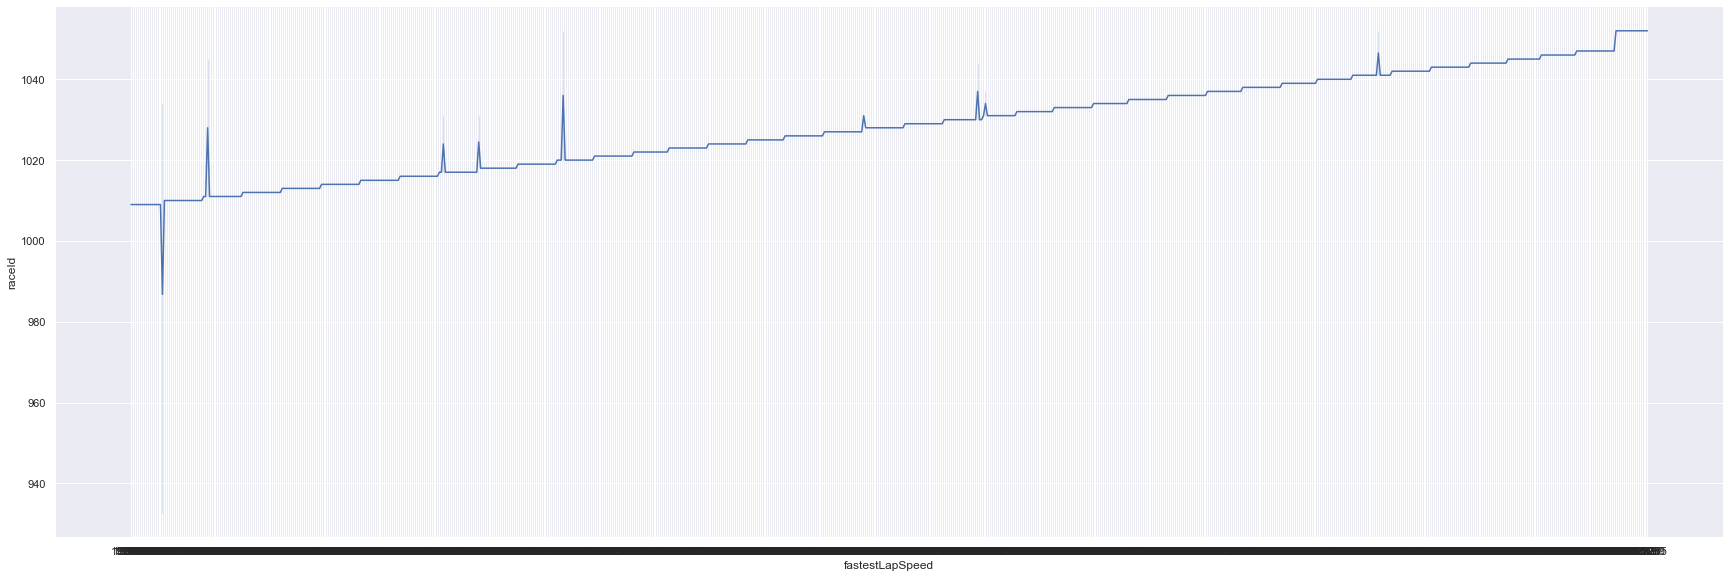

In [26]:
sns.set_theme()
sns.relplot(data=df, x="fastestLapSpeed", y="raceId", kind="line", height=8, aspect=3)

In [ ]:
# constant

##### Contexte :
Analyse du nombre de course par pilotes